In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'resources/us_counties_covid19_daily.csv'
data = pd.read_csv(file_path)
data.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
# Create a new column to group by: 0 for months 1-4, 1 for months 5-8, 2 for months 9-12
data['third'] = (data['date'].dt.month - 1) // 4

# Group by the new 'quarter' column
grouped = data.groupby('third')

# Split into 3 different DataFrames
dfs = [group for _, group in grouped]

In [5]:
#Picking the 3rd quarter to be analysed. 1st and 2nd quarter to be analysed by other group members
third_data = dfs[2]
third_data

,date,county,state,fips,cases,deaths,third
489196,2020-09-01,Autauga,Alabama,1001.0,1453,24.0,2
489197,2020-09-01,Baldwin,Alabama,1003.0,4568,42.0,2
489198,2020-09-01,Barbour,Alabama,1005.0,764,7.0,2
489199,2020-09-01,Bibb,Alabama,1007.0,558,8.0,2
489200,2020-09-01,Blount,Alabama,1009.0,1303,11.0,2
...,...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0,2
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0,2
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0,2
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0,2


In [6]:
# Print the number of rows for each DataFrame
for i, df in enumerate(dfs):
    print(f'Number of rows in DataFrame for quarter {i+1}: {len(df)}')

Number of rows in DataFrame for quarter 1: 103870
Number of rows in DataFrame for quarter 2: 385326
Number of rows in DataFrame for quarter 3: 311241


In [7]:
#checking the number of counties in the 3rd quarter data
individual_counties = third_data['county'].nunique()
individual_counties

1929

In [8]:
grouped_state_size = data.groupby(['state']).size()
grouped_state_size

state
Alabama                     17204
Alaska                       5953
Arizona                      4009
Arkansas                    19208
California                  15293
Colorado                    15991
Connecticut                  2375
Delaware                     1035
District of Columbia          274
Florida                     17730
Georgia                     41049
Guam                          266
Hawaii                       1102
Idaho                       10126
Illinois                    25584
Indiana                     23678
Iowa                        24670
Kansas                      24105
Kentucky                    29692
Louisiana                   16843
Maine                        4324
Maryland                     6545
Massachusetts                4054
Michigan                    21186
Minnesota                   21771
Mississippi                 21122
Missouri                    28291
Montana                     11312
Nebraska                    20189
Nevada  

<Figure size 1000x600 with 0 Axes>

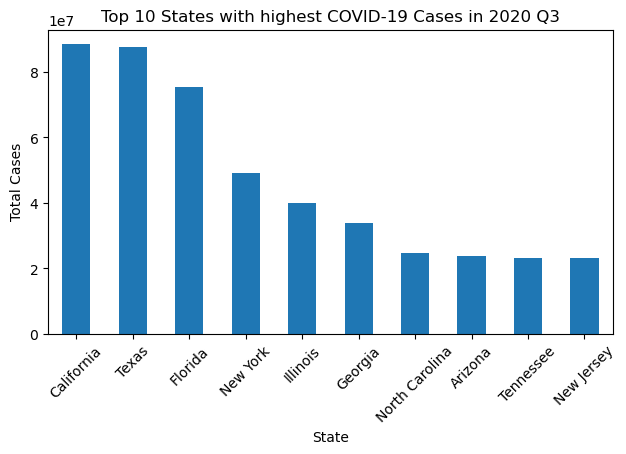

In [9]:
# Group by state and sum the cases to get states with most cases
grouped_by_state = third_data.groupby('state')[['cases']].sum()
# Sort grouped states
top_states = grouped_by_state.sort_values(by='cases', ascending=False).head(10)
top_states
# Create a bar chart for top 10 states
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', legend=None)
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Top 10 States with highest COVID-19 Cases in 2020 Q3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Group by county and calculate total cases for each county
grouped_by_county = third_data.groupby('county')['cases'].sum()
#top_counties = grouped_by_county.sort_values(by='cases', ascending=False).head(10)
top_counties = grouped_by_county.nlargest(10)
# top_counties

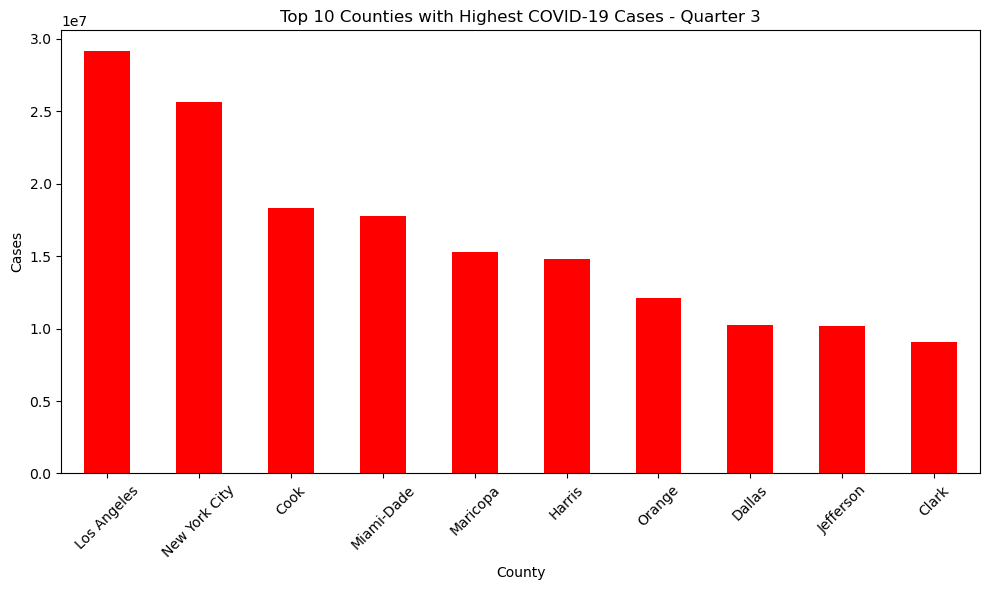

In [11]:
# Create a bar plot to display the top 10 counties with the highest cases
plt.figure(figsize=(10, 6))
top_counties.plot(kind='bar', color='red')
plt.xlabel('County')
plt.ylabel('Cases')
plt.title(f'Top 10 Counties with Highest COVID-19 Cases - Quarter 3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
#getting more information on the "cases" column
check_cases = third_data['cases'].describe()
check_cases

count    311241.000000
mean       2771.469498
std       11377.374389
min           0.000000
25%         195.000000
50%         584.000000
75%        1697.000000
max      439538.000000
Name: cases, dtype: float64

In [13]:
most_state_deaths = third_data.groupby('state')[['deaths']].sum()
top_states_deaths = most_state_deaths.sort_values(by='deaths', ascending=False).head(10)
top_states_deaths

,deaths
state,
New York,3180085.0
Texas,1699820.0
California,1610776.0
New Jersey,1568700.0
Florida,1495360.0
Illinois,960534.0
Massachusetts,943076.0
Pennsylvania,845162.0
Michigan,740690.0


<Figure size 1000x600 with 0 Axes>

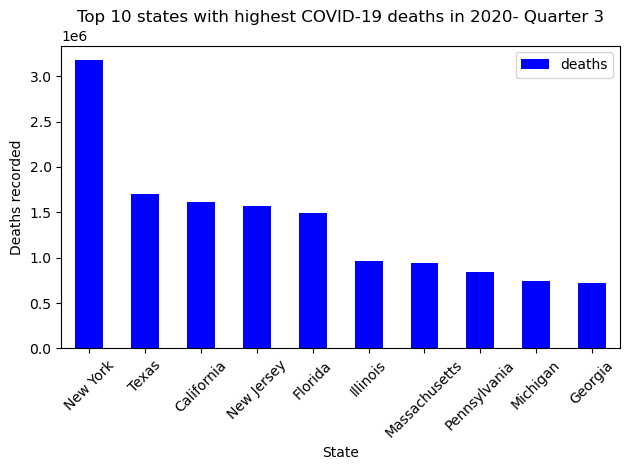

In [26]:
# Create a bar plot to display the top 10 states with the highest number of deaths
plt.figure(figsize=(10, 6))
top_states_deaths.plot(kind='bar', color='blue')
plt.xlabel('State')
plt.ylabel('Deaths recorded')
plt.title(f'Top 10 states with highest COVID-19 deaths in 2020- Quarter 3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
most_deaths_county = third_data.groupby('county')[['deaths']].sum()
top_deaths_county = most_deaths_county.sort_values(by='deaths', ascending=False).head(10)
top_deaths_county

,deaths
county,
New York City,2300010.0
Los Angeles,658349.0
Cook,536687.0
Middlesex,373252.0
Maricopa,338948.0
Essex,336174.0
Miami-Dade,327366.0
Wayne,321452.0
Suffolk,306165.0


<Figure size 1000x600 with 0 Axes>

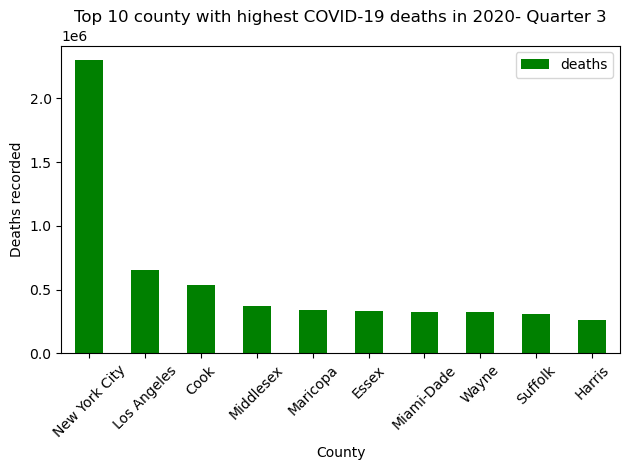

In [16]:
# Create a bar plot to display the top 10 counties with the highest number of deaths
plt.figure(figsize=(10, 6))
top_deaths_county.plot(kind='bar', color='green')
plt.xlabel('County')
plt.ylabel('Deaths recorded')
plt.title(f'Top 10 county with highest COVID-19 deaths in 2020- Quarter 3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
#what counties have the most deaths
most_death_counties_df = third_data.groupby(['deaths']).max()
most_death_counties_df.tail(10)

,date,county,state,fips,cases,third
deaths,,,,,,
24241.0,2020-11-26,New York City,New York,NaN,307261,2
24255.0,2020-11-27,New York City,New York,NaN,309822,2
24260.0,2020-11-28,New York City,New York,NaN,311920,2
24268.0,2020-11-29,New York City,New York,NaN,314223,2
24274.0,2020-11-30,New York City,New York,NaN,316724,2
24287.0,2020-12-01,New York City,New York,NaN,319301,2
24297.0,2020-12-02,New York City,New York,NaN,322501,2
24305.0,2020-12-03,New York City,New York,NaN,325806,2
24323.0,2020-12-04,New York City,New York,NaN,329406,2


In [18]:
#what counties have the most cases
most_case_counties_df = third_data.groupby(['cases']).max()
most_case_counties_df.tail(10)

,date,county,state,fips,deaths,third
cases,,,,,,
383373,2020-11-26,Los Angeles,California,6037.0,7580.0,2
387793,2020-11-27,Los Angeles,California,6037.0,7604.0,2
391004,2020-11-28,Los Angeles,California,6037.0,7623.0,2
395957,2020-11-29,Los Angeles,California,6037.0,7639.0,2
401034,2020-11-30,Los Angeles,California,6037.0,7655.0,2
408515,2020-12-01,Los Angeles,California,6037.0,7700.0,2
414304,2020-12-02,Los Angeles,California,6037.0,7740.0,2
422000,2020-12-03,Los Angeles,California,6037.0,7782.0,2
430713,2020-12-04,Los Angeles,California,6037.0,7842.0,2


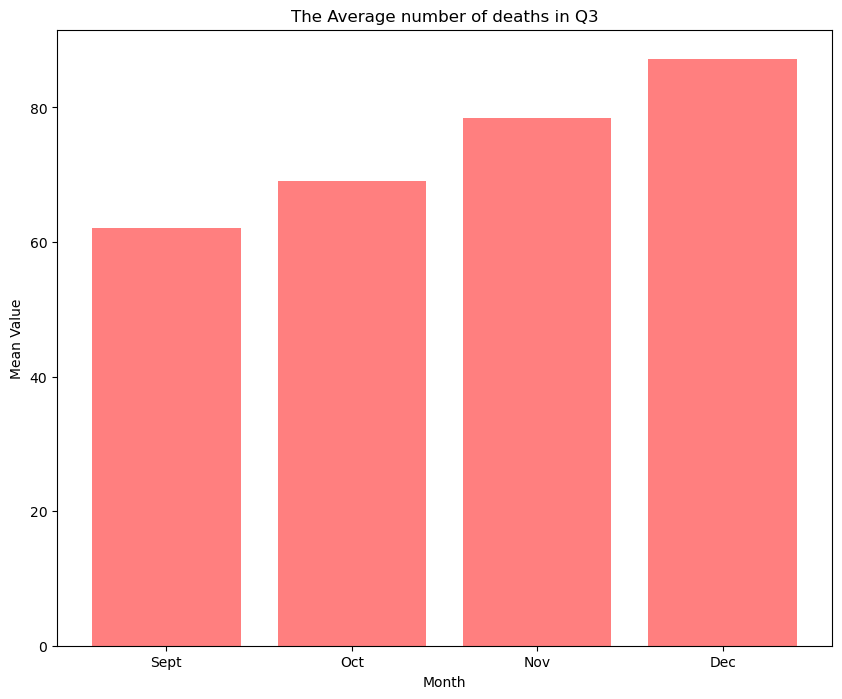

In [19]:
# Calculate the mean number of deaths by month 
monthly_deaths_mean  = third_data.groupby(third_data['date'].dt.month)['deaths'].mean()

plt.figure(figsize=(10, 8))
plt.bar(monthly_deaths_mean.index, monthly_deaths_mean.values, color='r', alpha= 0.5)
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.title('The Average number of deaths in Q3')
tick_locations = [value for value in monthly_deaths_mean.index]
plt.xticks(tick_locations, ['Sept', 'Oct', 'Nov', 'Dec'])
plt.show()

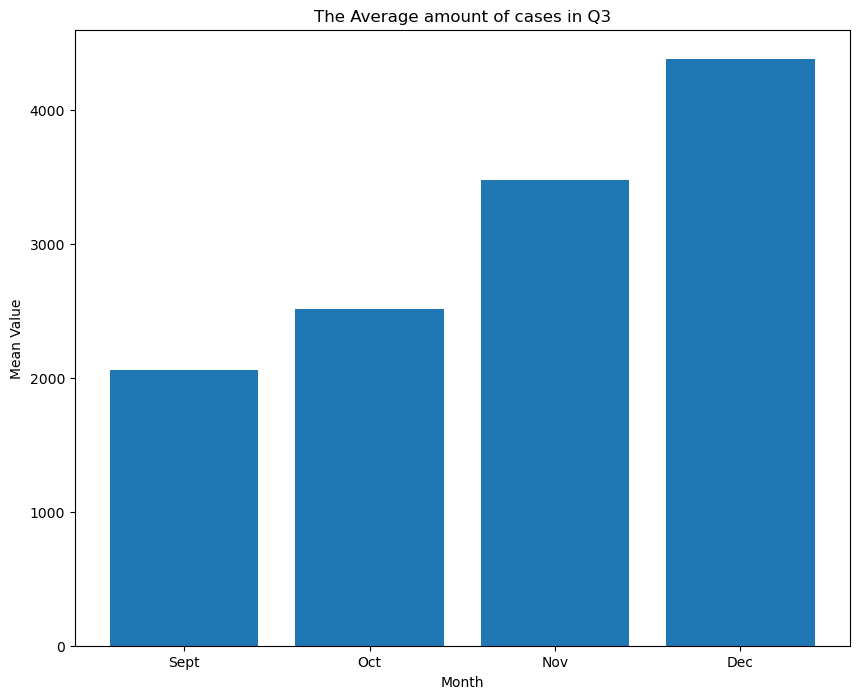

In [20]:
# Calculate the mean number of cases for each month in 3rd quarter
monthly_cases_mean  = third_data.groupby(third_data['date'].dt.month)['cases'].mean()

plt.figure(figsize=(10, 8))
plt.bar(monthly_cases_mean.index, monthly_cases_mean.values)
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.title('The Average amount of cases in Q3')
tick_locations = [value for value in monthly_cases_mean.index]
plt.xticks(tick_locations, ['Sept', 'Oct', 'Nov', 'Dec'])
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt

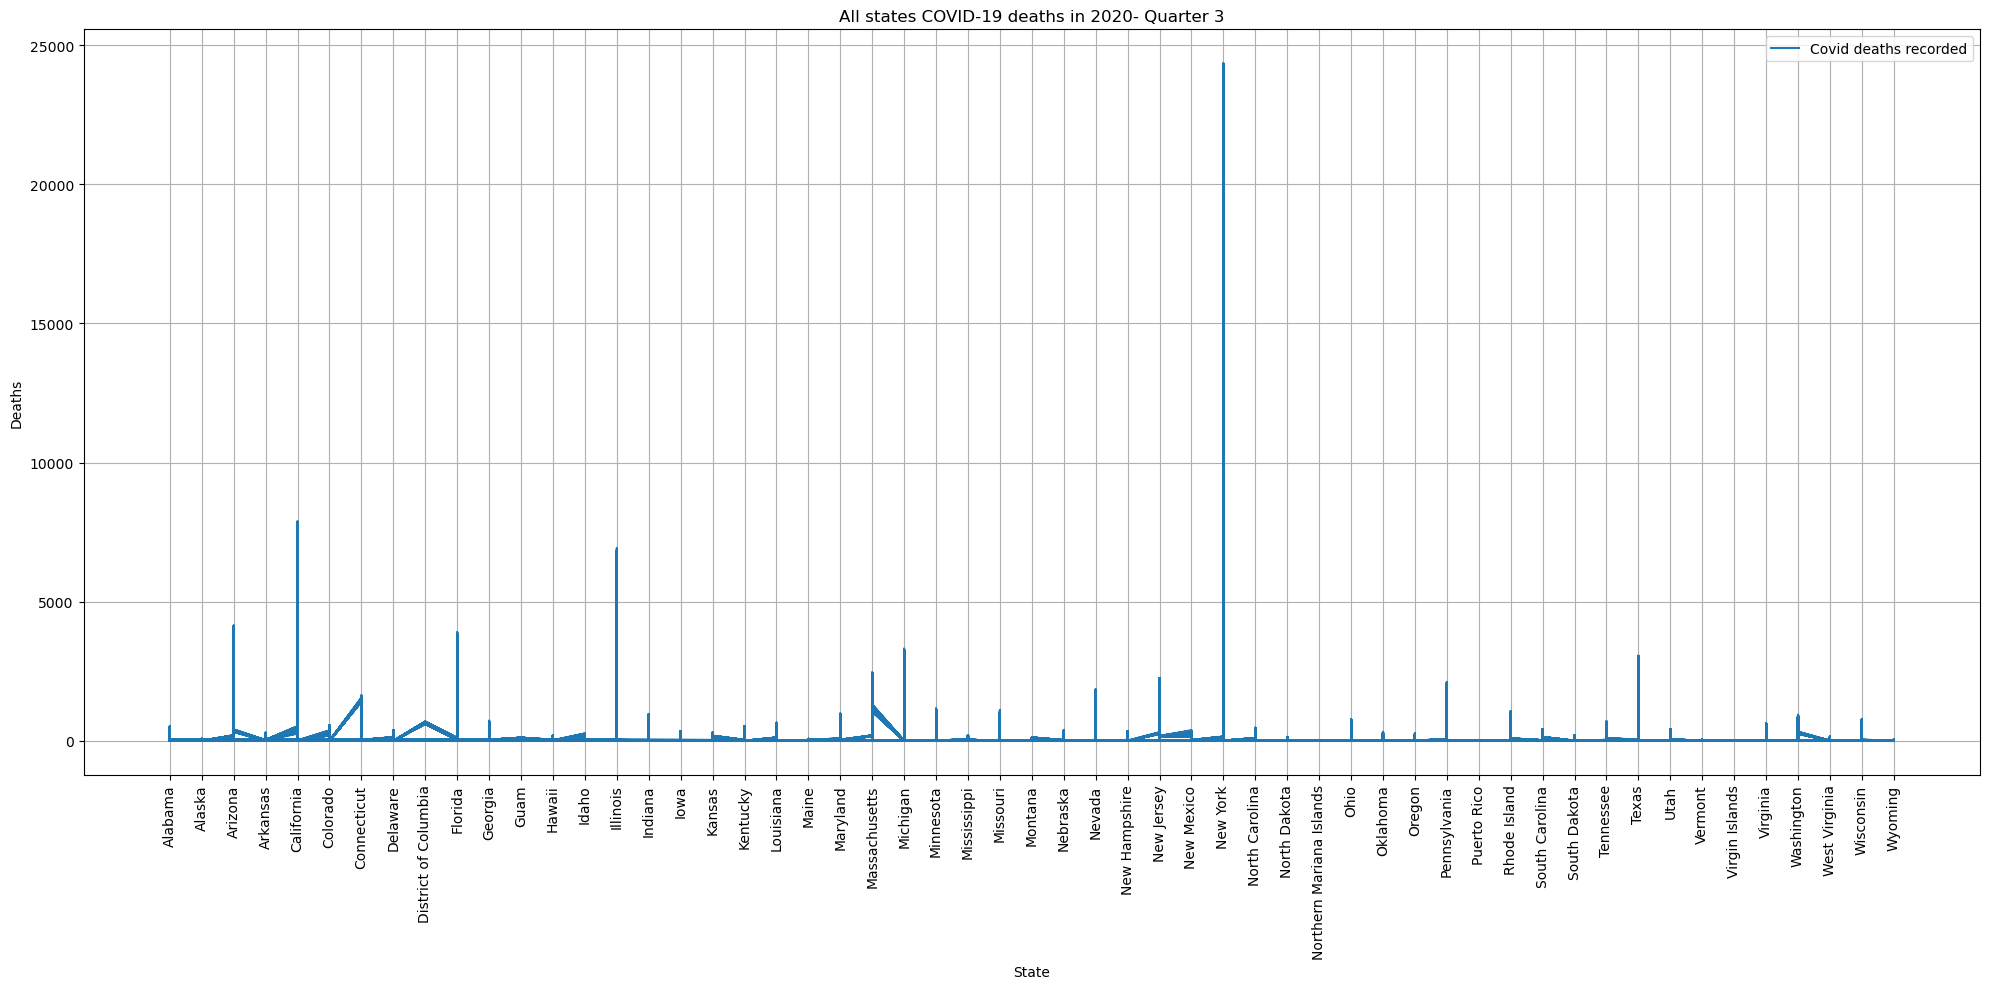

In [22]:
#plot for number of deaths in all the states
plt.figure(figsize=(20, 10))
plt.plot(third_data['state'], third_data['deaths'], label='Covid deaths recorded')
plt.xlabel('State')
plt.ylabel('Deaths')
plt.title(f'All states COVID-19 deaths in 2020- Quarter 3')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


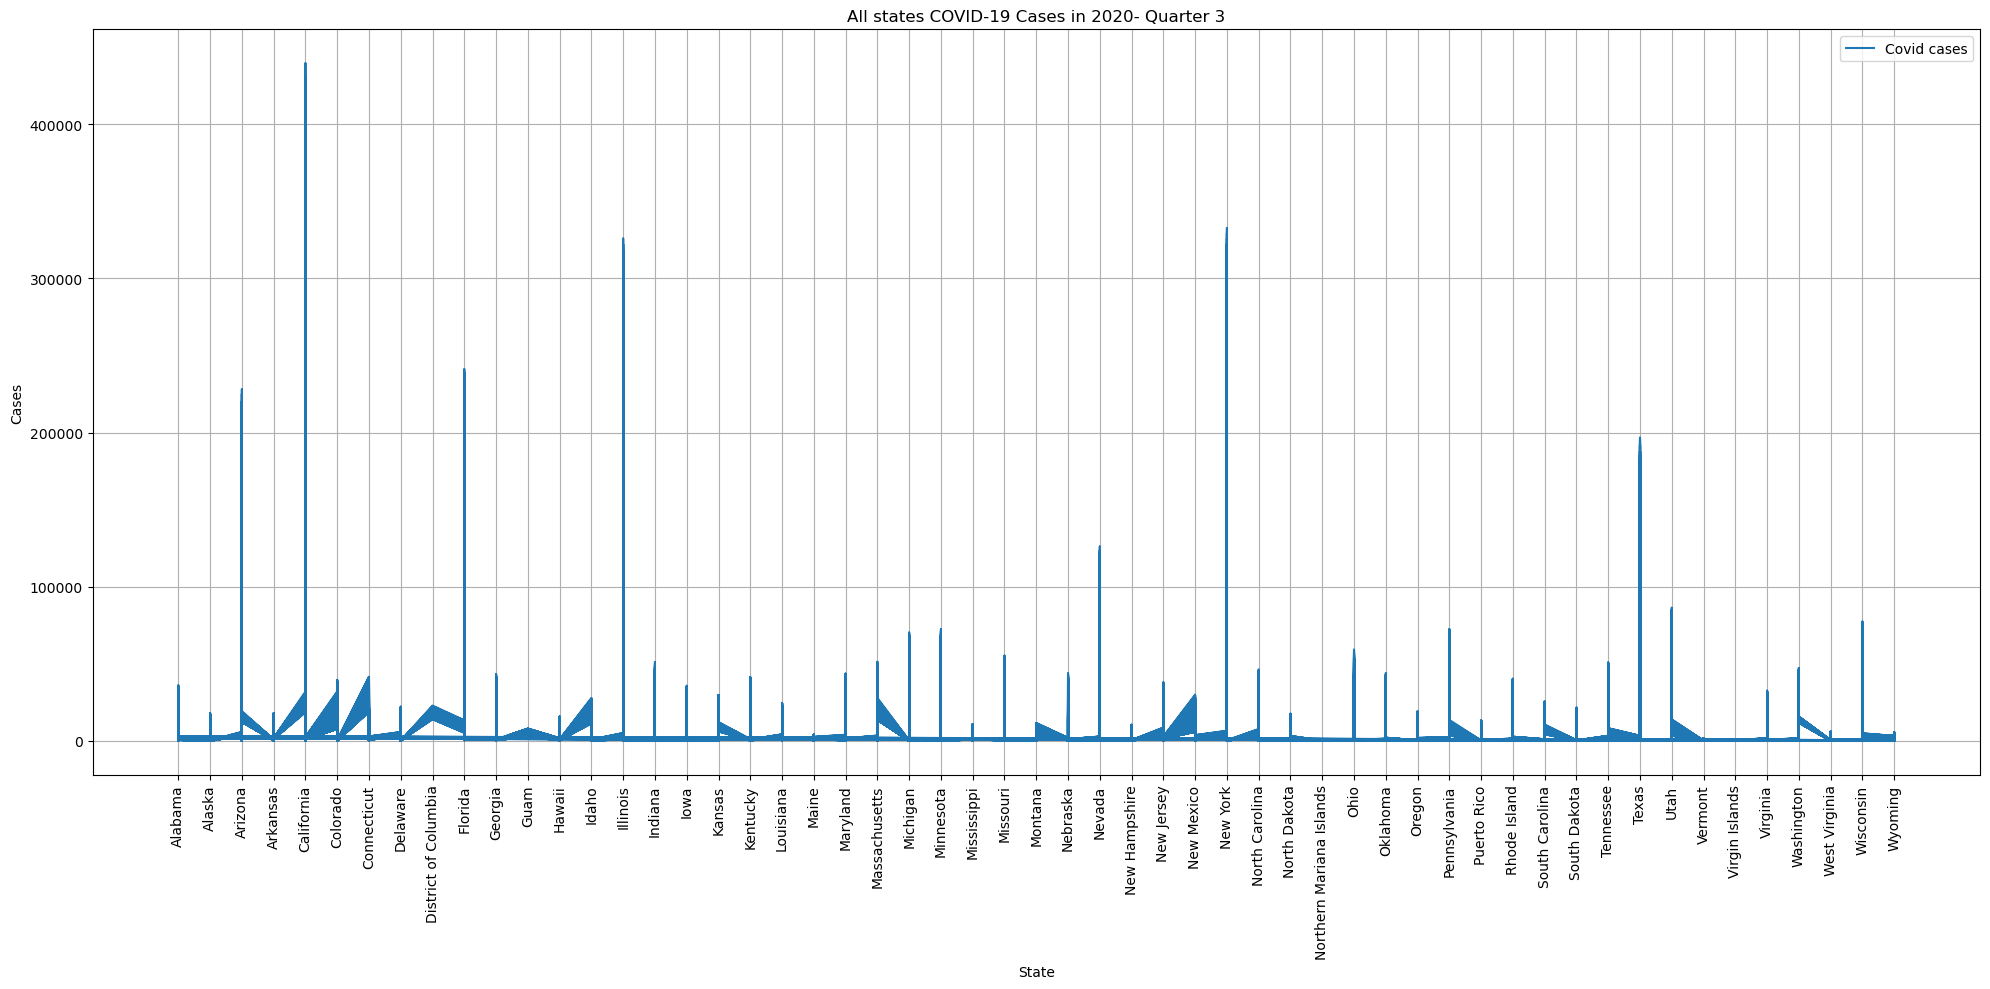

In [23]:
#plot for number of cases in all the states
plt.figure(figsize=(20, 10))
plt.plot(third_data['state'], third_data['cases'], label='Covid cases')
plt.xlabel('State')
plt.ylabel('Cases')
plt.title(f'All states COVID-19 Cases in 2020- Quarter 3')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



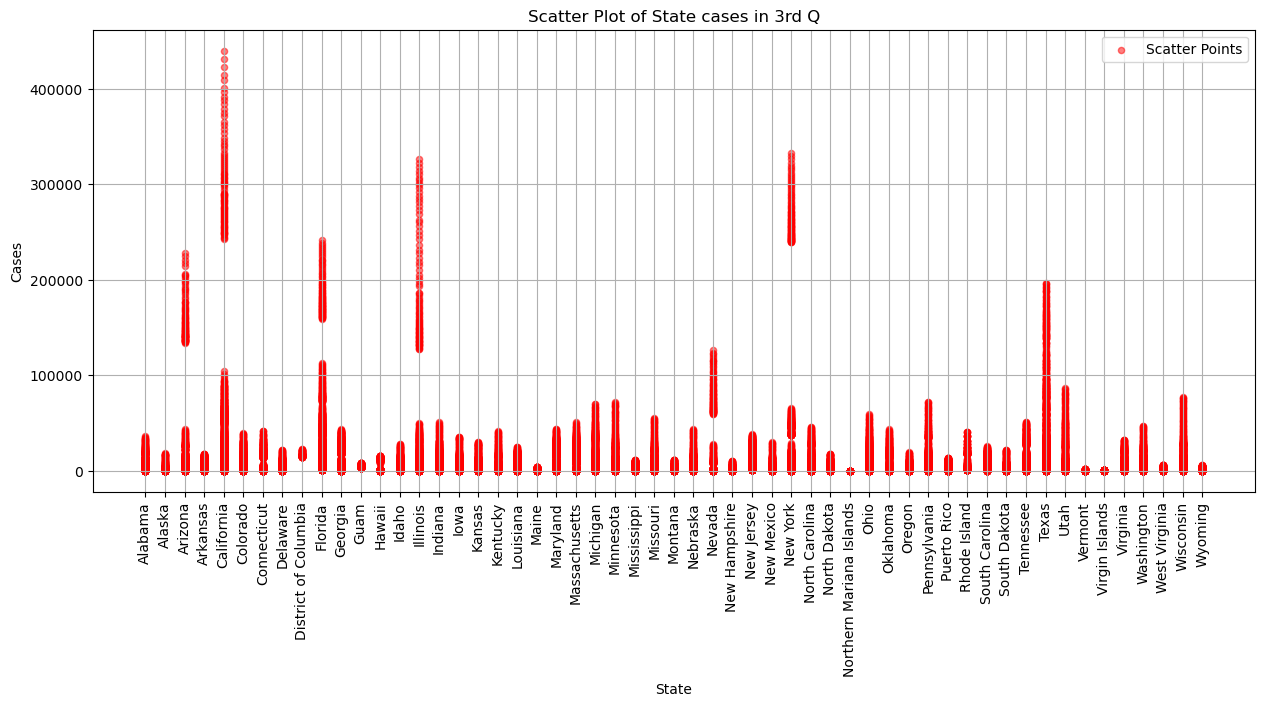

In [24]:
#scatter plot of state cases

plt.figure(figsize=(15, 6))

plt.scatter(third_data['state'], third_data['cases'], s=20, alpha=0.5, color='r', label='Scatter Points')

plt.xlabel('State')
plt.ylabel('Cases')
plt.title('Scatter Plot of State cases in 3rd Q')
plt.legend()

plt.grid(True)
plt.xticks(rotation=90)
plt.show()


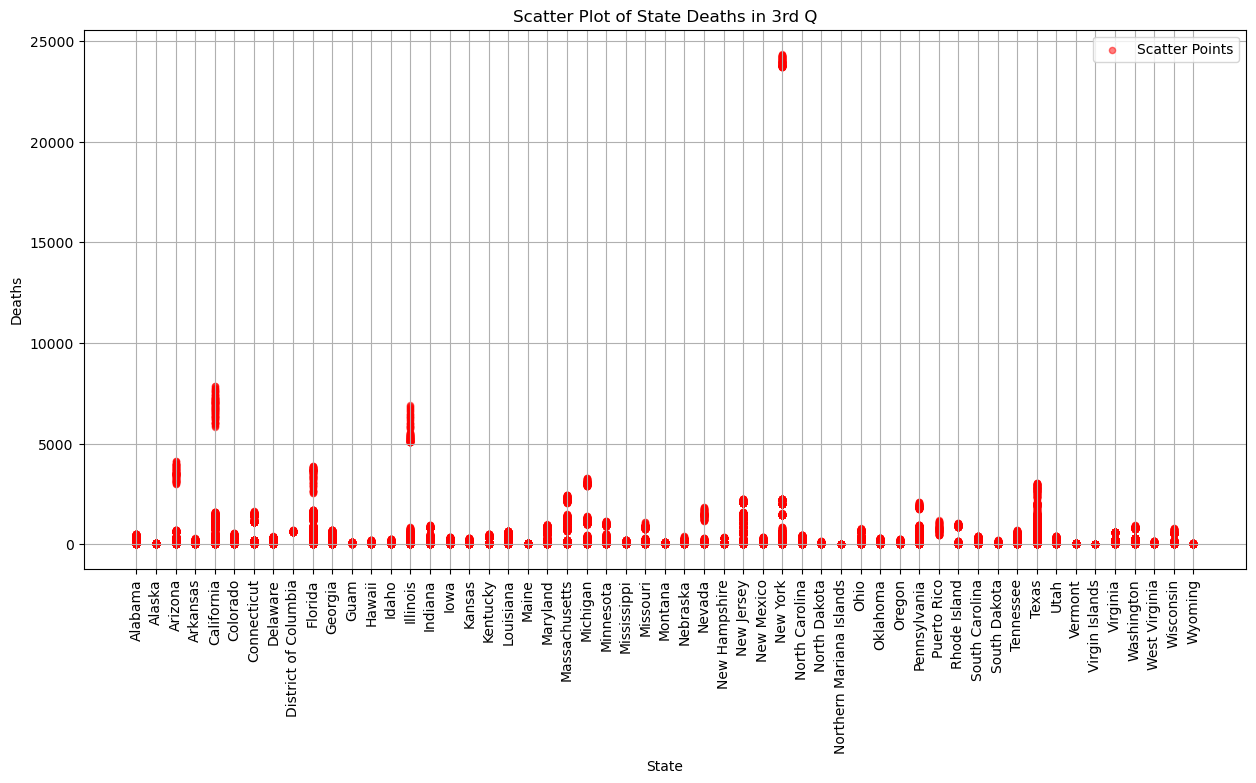

In [25]:
#Scatter plot of state deaths

plt.figure(figsize=(15, 7))

plt.scatter(third_data['state'], third_data['deaths'], s=20, alpha=0.5, color='r', label='Scatter Points')

plt.xlabel('State')
plt.ylabel('Deaths')
plt.title('Scatter Plot of State Deaths in 3rd Q')
plt.legend()

plt.grid(True)
plt.xticks(rotation=90)
plt.show()

